In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
input_file = "c:\\diabetes.csv"
df = pd.read_csv(input_file, header = 0)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
numpy_array = df.to_numpy()
X = numpy_array[:,:-1]
y = numpy_array[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Number of mislabeled points out of a total 384 points : 123
The accuracy is 0.68


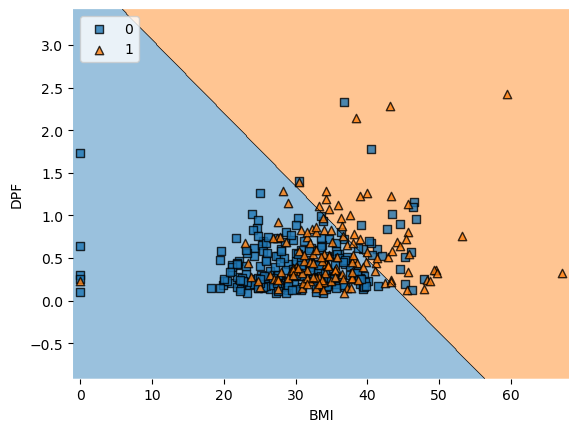

In [5]:
# Only use BMI and DiabetesPedigreeFunction as the input features
XX = numpy_array[:,[5,6]]
XX_train, XX_test, y_train, y_test = train_test_split(XX, y, test_size=0.5, random_state=0)
# perform lda
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis( store_covariance=True)
classifier = lda.fit(XX_train, y_train)
y_pred = classifier.predict(XX_test)
print("Number of mislabeled points out of a total %d points : %d" %(XX_test.shape[0], (y_test != y_pred).sum()))
Acc = (XX_test.shape[0]-(y_test != y_pred).sum())/XX_test.shape[0]
print(f"The accuracy is {Acc :.2f}")

## Plot the decision boundary
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt 
plot_decision_regions(XX_train, y_train.astype(np.int_),clf=classifier)
plt.xlabel('BMI')
plt.ylabel('DPF')
plt.legend(loc='upper left')
plt.show()

## Linear Regression

Number of mislabeled points out of a total 384 points : 122
The accuracy is 0.68


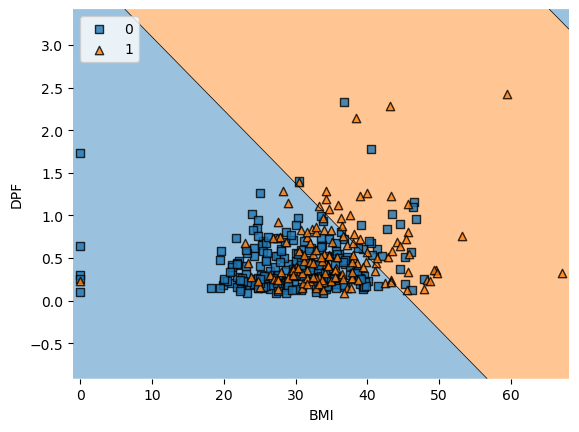

In [19]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(XX_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(XX_test)
y_pred = (y_pred>0.5)*1
print("Number of mislabeled points out of a total %d points : %d" %(XX_test.shape[0], (y_test != y_pred).sum()))
Acc = (XX_test.shape[0]-(y_test != y_pred).sum())/XX_test.shape[0]
print(f"The accuracy is {Acc :.2f}")

## Plot the decision boundary
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt 
plot_decision_regions(XX_train, y_train.astype(np.int_),clf=regr)
plt.xlabel('BMI')
plt.ylabel('DPF')
plt.legend(loc='upper left')
plt.show()

## Ridge Regression

In [29]:
from sklearn.linear_model import Ridge
# Create linear regression object
ridg = Ridge(alpha=100)

# Train the model using the training sets
ridg.fit(XX_train, y_train)

# Make predictions using the testing set
y_pred = ridg.predict(XX_test)
y_pred = (y_pred>0.5)*1
print("Number of mislabeled points out of a total %d points : %d" %(XX_test.shape[0], (y_test != y_pred).sum()))
Acc = (XX_test.shape[0]-(y_test != y_pred).sum())/XX_test.shape[0]
print(f"The accuracy is {Acc :.2f}")

Number of mislabeled points out of a total 384 points : 126
The accuracy is 0.67


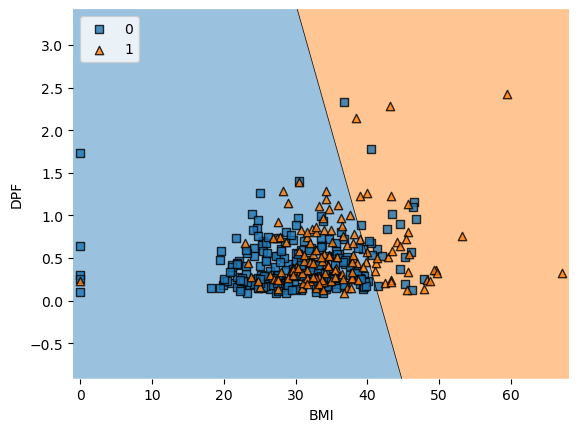

In [30]:
## Plot the decision boundary
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt 
plot_decision_regions(XX_train, y_train.astype(np.int_),clf=ridg)
plt.xlabel('BMI')
plt.ylabel('DPF')
plt.legend(loc='upper left')
plt.show()